# Problem 3: Barycentric interpolation

**Question 1 and 2**

Initially, we have to generate the random points and the function in the unit square for the given sample. Then we set building block 1 and 2. 

A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]
y in ABC with coordinates: [0.20901926 0.37774759]
Barycentric coordinates of ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
y not in CDA
Barycentric coordinates of CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)


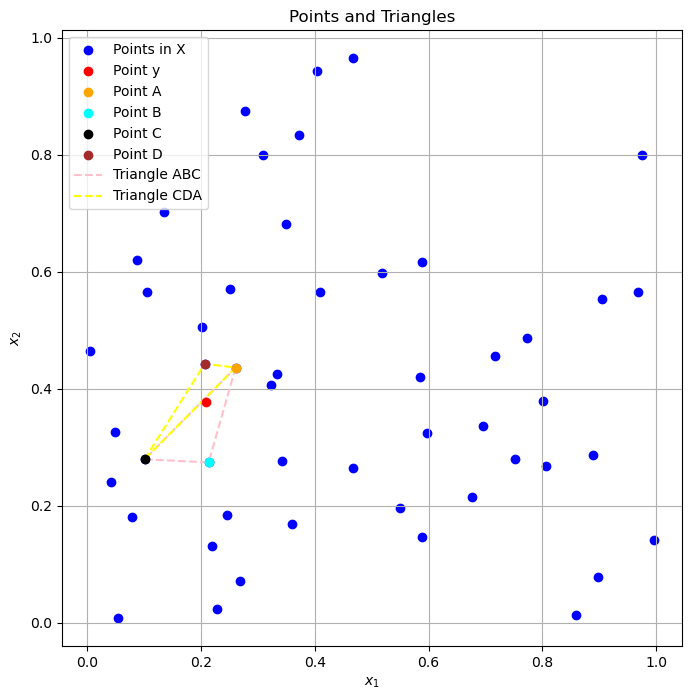

In [1]:
# Import algorithm from py file
from examp3 import Model3

# Create an instance of the class
model = Model3()
# Find nearest points A, B, C, D and print
print("A:", model.A) 
print("B:", model.B)
print("C:", model.C)
print("D:", model.D)


# Check if the point y is inside any triangle, and which triangle that might be and get coordinates
result1 = model.check_y_in_tri()


# Plot the points and triangles
model.plot_point_and_tri()

**Question 3**

In [4]:
f_y, true_value, diff_true = model.approx_f()

y in ABC with coordinates: [0.20901926 0.37774759]
Barycentric coordinates of ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
y not in CDA
Barycentric coordinates of CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
Approximation f(y): 0.08405201731052576
True value f(y): 0.0789565216259594
Difference: 0.005095495684566367


**Question 4**

In [6]:
Y=[(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.8, 0.2), (0.5, 0.5)]
result4 = model.func_4(Y)



Evaluating for y = (0.2, 0.2):
y in ABC with coordinates: [0.2 0.2]
Barycentric coordinates of ABC: (0.1805466701524854, 0.5826765149253863, 0.23677681492212832)
y not in CDA
Barycentric coordinates of CDA: (0.7507400810688765, -0.7794749222521683, 1.028734841183292)
Approximation f(y): 0.04032631372248057
True value f(y): 0.04000000000000001
Difference: 0.0003263137224805632

Evaluating for y = (0.8, 0.2):
y in ABC with coordinates: [0.8 0.2]
Barycentric coordinates of ABC: (0.5874166293573827, 0.2678463596528006, 0.14473701098981667)
y not in CDA
Barycentric coordinates of CDA: (0.4187612872222544, -1.5023945927888533, 2.083633305566599)
Approximation f(y): 0.15874233999349835
True value f(y): 0.16000000000000003
Difference: 0.0012576600065016819

Evaluating for y = (0.8, 0.8):
Approximation f(y): nan
True value f(y): 0.6400000000000001
Difference: nan

Evaluating for y = (0.8, 0.2):
y in ABC with coordinates: [0.8 0.2]
Barycentric coordinates of ABC: (0.5874166293573827, 0.26784635